# CREDIT CARD FRAUD DETECTION 

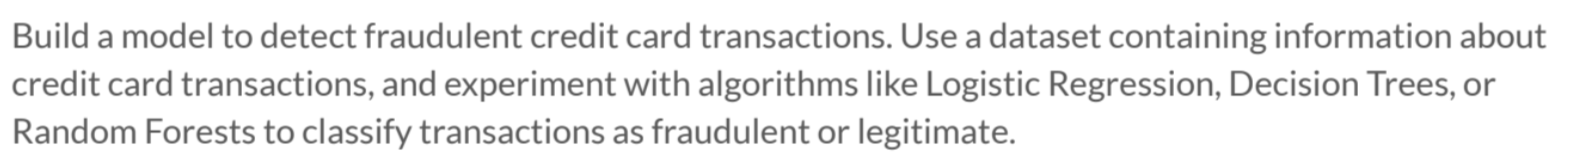

**IMPORT LIBRARIES**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn

**LOADING THE DATA**

In [2]:
df_test = pd.read_csv("fraudTest.csv")
df_train = pd.read_csv("fraudTrain.csv")

**EXPLORATORY DATA ANALYSIS**

In [3]:
df_test.shape

(555719, 23)

In [4]:
df_train.shape

(1296675, 23)

In [5]:
df_test.describe

<bound method NDFrame.describe of         Unnamed: 0 trans_date_trans_time            cc_num  \
0                0   2020-06-21 12:14:25  2291163933867244   
1                1   2020-06-21 12:14:33  3573030041201292   
2                2   2020-06-21 12:14:53  3598215285024754   
3                3   2020-06-21 12:15:15  3591919803438423   
4                4   2020-06-21 12:15:17  3526826139003047   
...            ...                   ...               ...   
555714      555714   2020-12-31 23:59:07    30560609640617   
555715      555715   2020-12-31 23:59:09  3556613125071656   
555716      555716   2020-12-31 23:59:15  6011724471098086   
555717      555717   2020-12-31 23:59:24     4079773899158   
555718      555718   2020-12-31 23:59:34  4170689372027579   

                                    merchant        category     amt    first  \
0                      fraud_Kirlin and Sons   personal_care    2.86     Jeff   
1                       fraud_Sporer-Keebler   personal_car

In [6]:
df_test.isnull()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
555715,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
555716,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
555717,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
df_test.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [8]:
df_test['is_fraud'].value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

**VISUALIZATION**

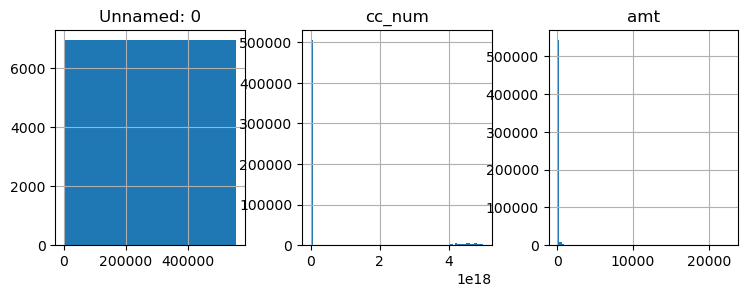

In [10]:
columns = list(df_test)[0:8]
df_test[columns].hist(bins=80,figsize=(12,50),layout=(14,4))
plt.show()

**SPLITTING THE DATASET** 

**SPITTING TEST DATA**

In [11]:
df_test= df_test.drop(['trans_date_trans_time','merchant','category','first','last','gender','street','state','job','dob','city','trans_num'],axis =1)

In [12]:
x_test = df_test.drop('is_fraud',axis =1)

In [13]:
x_test.head()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long
0,0,2291163933867244,2.86,29209,33.9659,-80.9355,333497,1371816865,33.986391,-81.200714
1,1,3573030041201292,29.84,84002,40.3207,-110.4360,302,1371816873,39.450498,-109.960431
2,2,3598215285024754,41.28,11710,40.6729,-73.5365,34496,1371816893,40.495810,-74.196111
3,3,3591919803438423,60.05,32780,28.5697,-80.8191,54767,1371816915,28.812398,-80.883061
4,4,3526826139003047,3.19,49632,44.2529,-85.0170,1126,1371816917,44.959148,-85.884734


In [14]:
y_test= df_test['is_fraud']

In [15]:
y_test.head()

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

**SPLITTING TRAIN DATA**

In [16]:
for i in df_train.columns:
    print(i)

Unnamed: 0
trans_date_trans_time
cc_num
merchant
category
amt
first
last
gender
street
city
state
zip
lat
long
city_pop
job
dob
trans_num
unix_time
merch_lat
merch_long
is_fraud


In [17]:
df_train = df_train.drop(['trans_date_trans_time','merchant','category','first','last','gender','street','state','job','dob','city','trans_num'],axis =1)

In [18]:
x_train = df_train.drop('is_fraud',axis =1)

In [19]:
x_train

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long
0,0,2703186189652095,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315
1,1,630423337322,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462
2,2,38859492057661,220.11,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481
3,3,3534093764340240,45.00,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071
4,4,375534208663984,41.96,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459
...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,30263540414123,15.56,84735,37.7175,-112.4777,258,1371816728,36.841266,-111.690765
1296671,1296671,6011149206456997,51.70,21790,39.2667,-77.5101,100,1371816739,38.906881,-78.246528
1296672,1296672,3514865930894695,105.93,88325,32.9396,-105.8189,899,1371816752,33.619513,-105.130529
1296673,1296673,2720012583106919,74.90,57756,43.3526,-102.5411,1126,1371816816,42.788940,-103.241160


In [20]:
y_train= df_train['is_fraud']

In [21]:
y_train

0          0
1          0
2          0
3          0
4          0
          ..
1296670    0
1296671    0
1296672    0
1296673    0
1296674    0
Name: is_fraud, Length: 1296675, dtype: int64

In [22]:
from sklearn import metrics 

from sklearn.linear_model import LogisticRegression

# Fit the model on train
logistic_model = LogisticRegression(solver="liblinear")
logistic_model.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [23]:
logistic_predict = logistic_model.predict(x_test)
logistic_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [24]:
print(logistic_model.score(x_test,y_test))

0.9961401355721147


<IPython.core.display.Javascript object>

<Axes: >

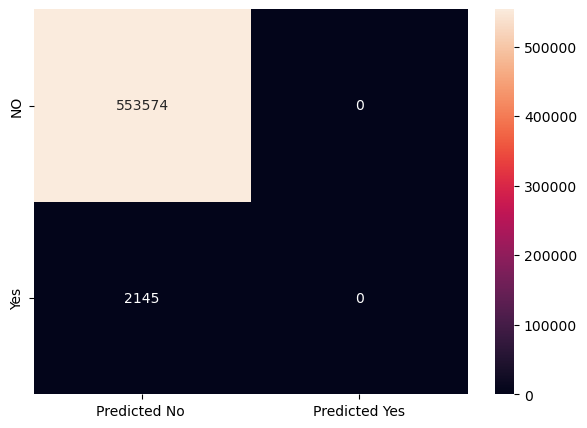

In [25]:
cm = metrics.confusion_matrix(y_test,logistic_predict,labels=[0,1])
      
df_cm = pd.DataFrame(cm,index=[i for i in ["NO","Yes"]],
                     columns = [i for i in ["Predicted No ","Predicted Yes"]])
                                            
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

**DECISION TREE CLASSIFIER**

In [26]:
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier(criterion='gini',max_depth = 3,random_state=1)
dTree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [27]:
dTree_predict = dTree.predict(x_test)

In [28]:
print(dTree.score(x_test,y_test))

0.9958522202767945


<IPython.core.display.Javascript object>

<Axes: >

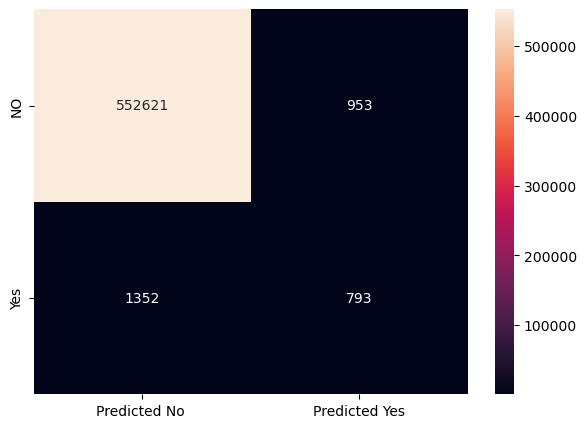

In [29]:
cm = metrics.confusion_matrix(y_test,dTree_predict,labels=[0,1])
      
df_cm = pd.DataFrame(cm,index=[i for i in ["NO","Yes"]],
                     columns = [i for i in ["Predicted No ","Predicted Yes"]])
                                            
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

**RANDOM FOREST CLASSIFIER**

In [33]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 10 , random_state = 1 , max_features =20)
rfcl = rfcl.fit(x_train,y_train)

In [34]:
random_predict = rfcl.predict(x_test)

In [37]:
print(rfcl.score(x_test,y_test))

0.9898905741930724


<IPython.core.display.Javascript object>

<Axes: >

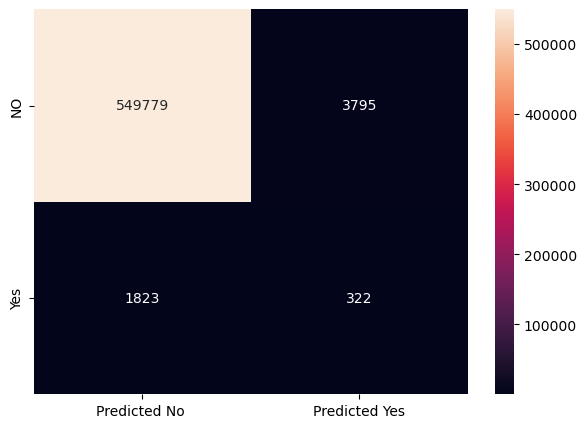

In [38]:
cm = metrics.confusion_matrix(y_test,random_predict,labels=[0,1])
      
df_cm = pd.DataFrame(cm,index=[i for i in ["NO","Yes"]],
                     columns = [i for i in ["Predicted No ","Predicted Yes"]])
                                            
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')